<a href="https://colab.research.google.com/github/notnsas/cautious-eureka/blob/main/aplikasi_ds/UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **NO 1**

In [1325]:
# Manipulasi data
import pandas as pd
import numpy as np

# Kaggle Hub buat import dataset
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Visualisasi Data
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Pemodelan dan Evaluasi
from sklearn.model_selection import train_test_split, GridSearchCV, PredefinedSplit
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [1326]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]


# Set the path to the file you'd like to load
# file_path = "DATA RUMAH.xlsx"
file_path = "HARGA RUMAH JAKSEL.xlsx"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "wisnuanggara/daftar-harga-rumah",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

/tmp/ipython-input-1326-2058605452.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


In [1327]:
# Agar data tidak terpotong
pd.set_option('display.max_colwidth', None)

# Mengganti nama kolom dari unnamed ke nama kolom yang benar
df.columns = df.iloc[0]

# Menghapus row yang salah
df = df.drop(0, axis=0).reset_index(drop=True)

# Liat data teratas
df.head(15)

,HARGA,LT,LB,JKT,JKM,GRS,KOTA
0,28000000000,1100,700,5,6,ADA,JAKSEL
1,19000000000,824,800,4,4,ADA,JAKSEL
2,4700000000,500,400,4,3,ADA,JAKSEL
3,4900000000,251,300,5,4,ADA,JAKSEL
4,28000000000,1340,575,4,5,ADA,JAKSEL
5,10000000000,460,300,4,4,ADA,JAKSEL
6,7600000000,278,350,4,4,ADA,JAKSEL
7,5250000000,511,300,3,2,ADA,JAKSEL
8,670000000,70,69,3,2,TIDAK ADA,JAKSEL
9,480000000,66,42,2,1,TIDAK ADA,JAKSEL


In [1328]:
# Informasi dari data (type data, jumlah data yang non-null, dll)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   HARGA   1001 non-null   object
 1   LT      1001 non-null   object
 2   LB      1001 non-null   object
 3   JKT     1001 non-null   object
 4   JKM     1001 non-null   object
 5   GRS     1001 non-null   object
 6   KOTA    1001 non-null   object
dtypes: object(7)
memory usage: 54.9+ KB


In [1329]:
# Mengganti nomor yang masing object
df[["HARGA", "LT", "LB", "JKT", "JKM"]] = df[["HARGA", "LT", "LB", "JKT", "JKM"]].astype(float)

# Memastikan type data sudah benar
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HARGA   1001 non-null   float64
 1   LT      1001 non-null   float64
 2   LB      1001 non-null   float64
 3   JKT     1001 non-null   float64
 4   JKM     1001 non-null   float64
 5   GRS     1001 non-null   object 
 6   KOTA    1001 non-null   object 
dtypes: float64(5), object(2)
memory usage: 54.9+ KB


## **EDA**

In [1330]:
# Ringkasan statistika
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
HARGA,1001.0,1.747472e+10,2.079548e+10,430000000.0,6.750000e+09,1.350000e+10,2.000000e+10,2.500000e+11
LT,1001.0,5.305045e+02,5.310698e+02,22.0,2.200000e+02,4.000000e+02,6.770000e+02,6.790000e+03
LB,1001.0,4.872757e+02,4.528723e+02,38.0,3.000000e+02,4.110000e+02,6.000000e+02,1.000000e+04
JKT,1001.0,4.457542e+00,2.004606e+00,1.0,4.000000e+00,4.000000e+00,5.000000e+00,2.700000e+01
JKM,1001.0,3.940060e+00,1.903261e+00,1.0,3.000000e+00,4.000000e+00,4.000000e+00,2.700000e+01


In [1331]:
# Memeriksa data duplikat
print(f'Jumlah data duplikat :  {df.duplicated().sum()}')
print(f'Jumlah baris sebelum menghapus duplikat: {len(df)}')

# Menghapus data dupliksa
df = df.drop_duplicates().reset_index(drop=True)

# Memverifikasi setelah penanganan
print(f'Jumlah baris setelah menghapus duplikat : {len(df)}')

Jumlah data duplikat :  70
Jumlah baris sebelum menghapus duplikat: 1001
Jumlah baris setelah menghapus duplikat : 931


In [1332]:
# Memeriksa nilai yang hilang (missing values)
df.isna().sum()

,0
0,
HARGA,0
LT,0
LB,0
JKT,0
JKM,0
GRS,0
KOTA,0


Kolom Numerik Berupa :  Index(['HARGA', 'LT', 'LB', 'JKT', 'JKM'], dtype='object', name=0)

Visualisasi Distribusi Setiap Fitur:


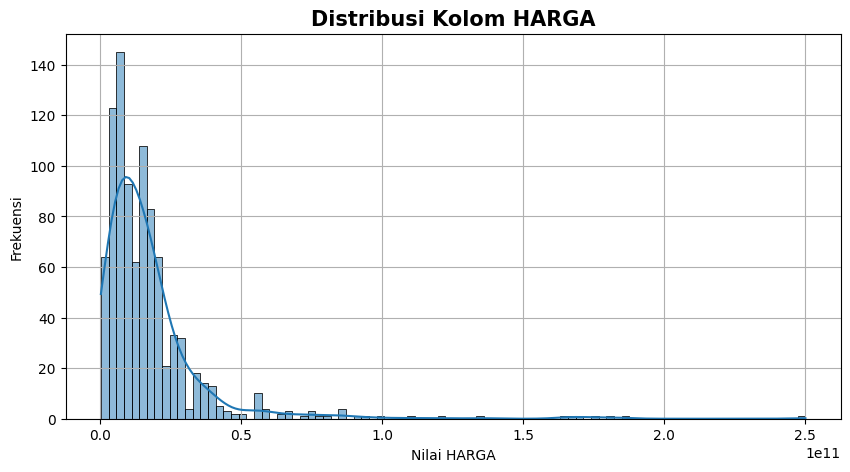

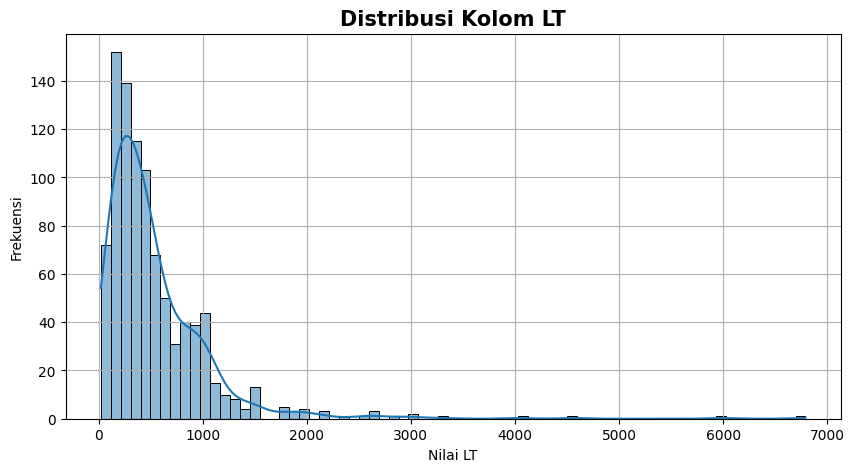

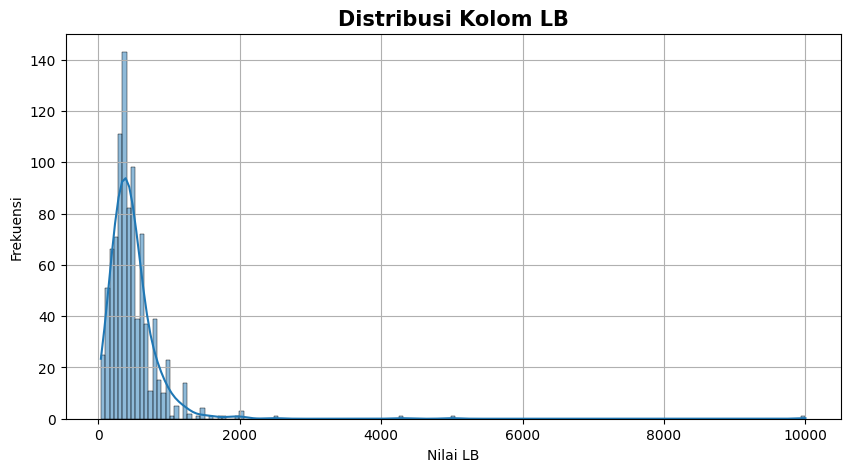

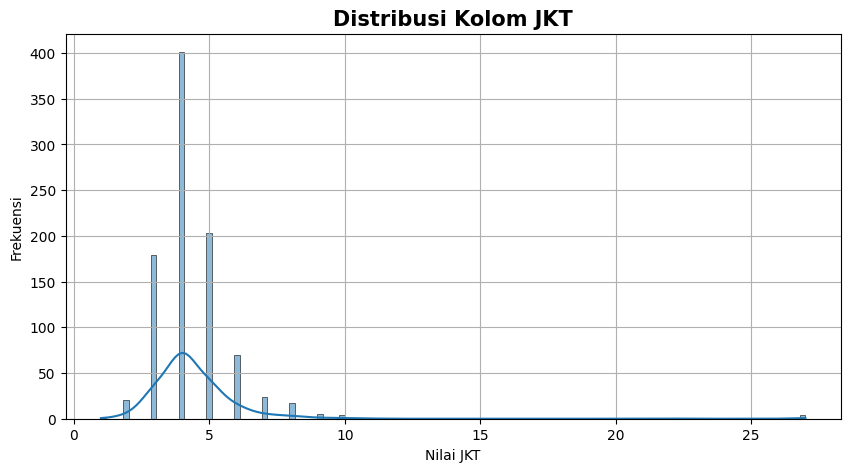

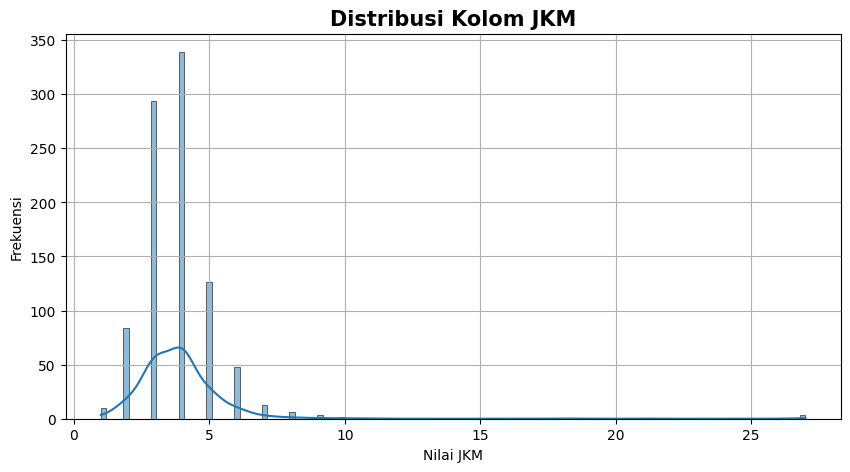

In [1333]:
def visualisasi_histogram(df):
  # Dapetin kolom numerik
  col_num = df.select_dtypes(include='number').columns
  print(f"Kolom Numerik Berupa :  {col_num}")

  # Visualisasi distribusi menggunakan histogram
  print("\nVisualisasi Distribusi Setiap Fitur:")
  for column in col_num:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Distribusi Kolom {column}', fontweight='bold', fontsize=15)
    plt.xlabel(f'Nilai {column}')
    plt.ylabel(f'Frekuensi')
    plt.grid(True)
visualisasi_histogram(df)

Kolom Numerik Berupa :  Index(['HARGA', 'LT', 'LB', 'JKT', 'JKM'], dtype='object', name=0)

Visualisasi Scatterplot Setiap Fitur:


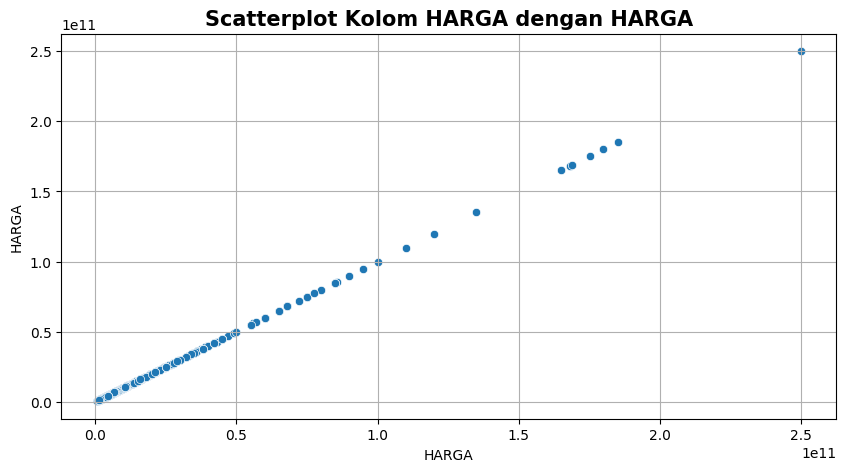

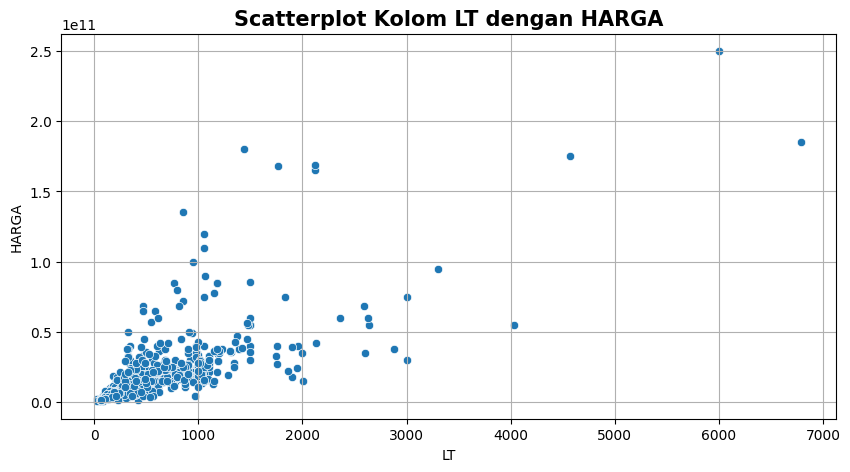

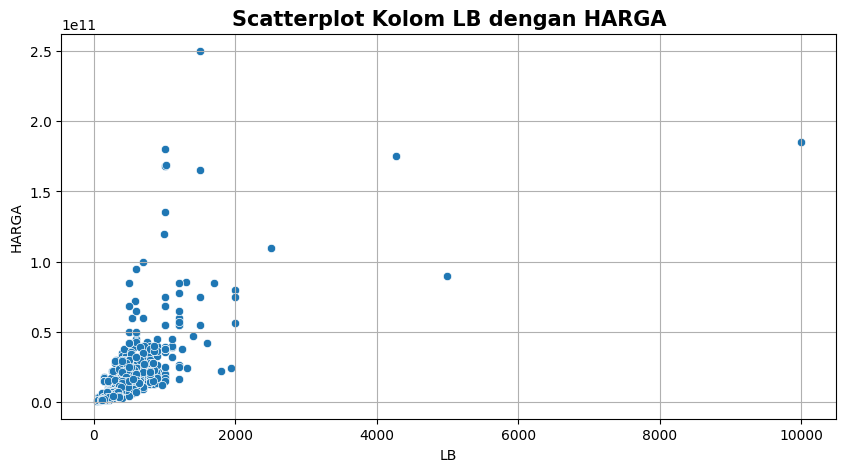

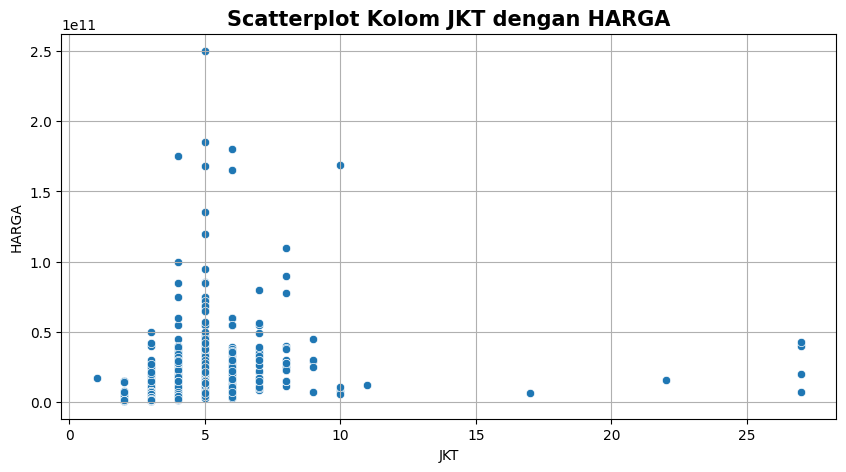

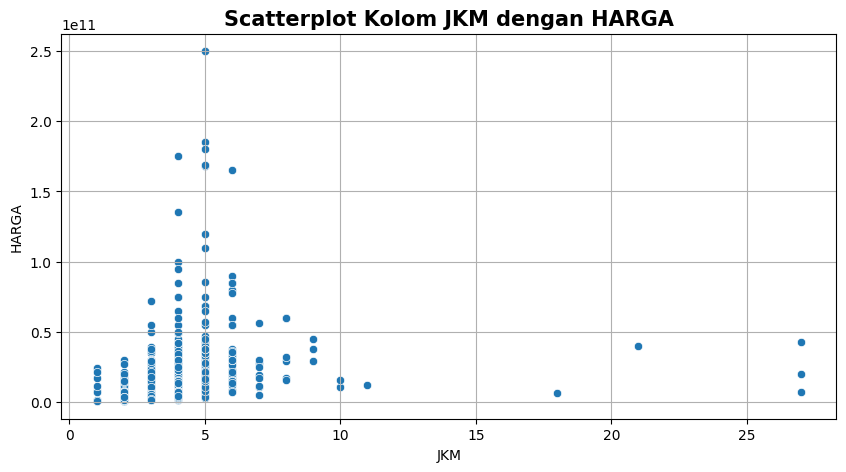

In [1334]:
def visualisasi_scatter(df):
  # Dapetin kolom numerik
  col_num = df.select_dtypes(include='number').columns
  print(f"Kolom Numerik Berupa :  {col_num}")

  # Visualisasi scatterplot
  print("\nVisualisasi Scatterplot Setiap Fitur:")
  for column in col_num:
    plt.figure(figsize=(10, 5))
    # sns.histplot(data=df, x=column, kde=True)
    sns.scatterplot(x=column, y="HARGA", data=df)
    plt.title(f'Scatterplot Kolom {column} dengan HARGA', fontweight='bold', fontsize=15)
    plt.xlabel(f'{column}')
    plt.ylabel(f'HARGA')
    plt.grid(True)
visualisasi_scatter(df)


Boxplot untuk setiap fitur:


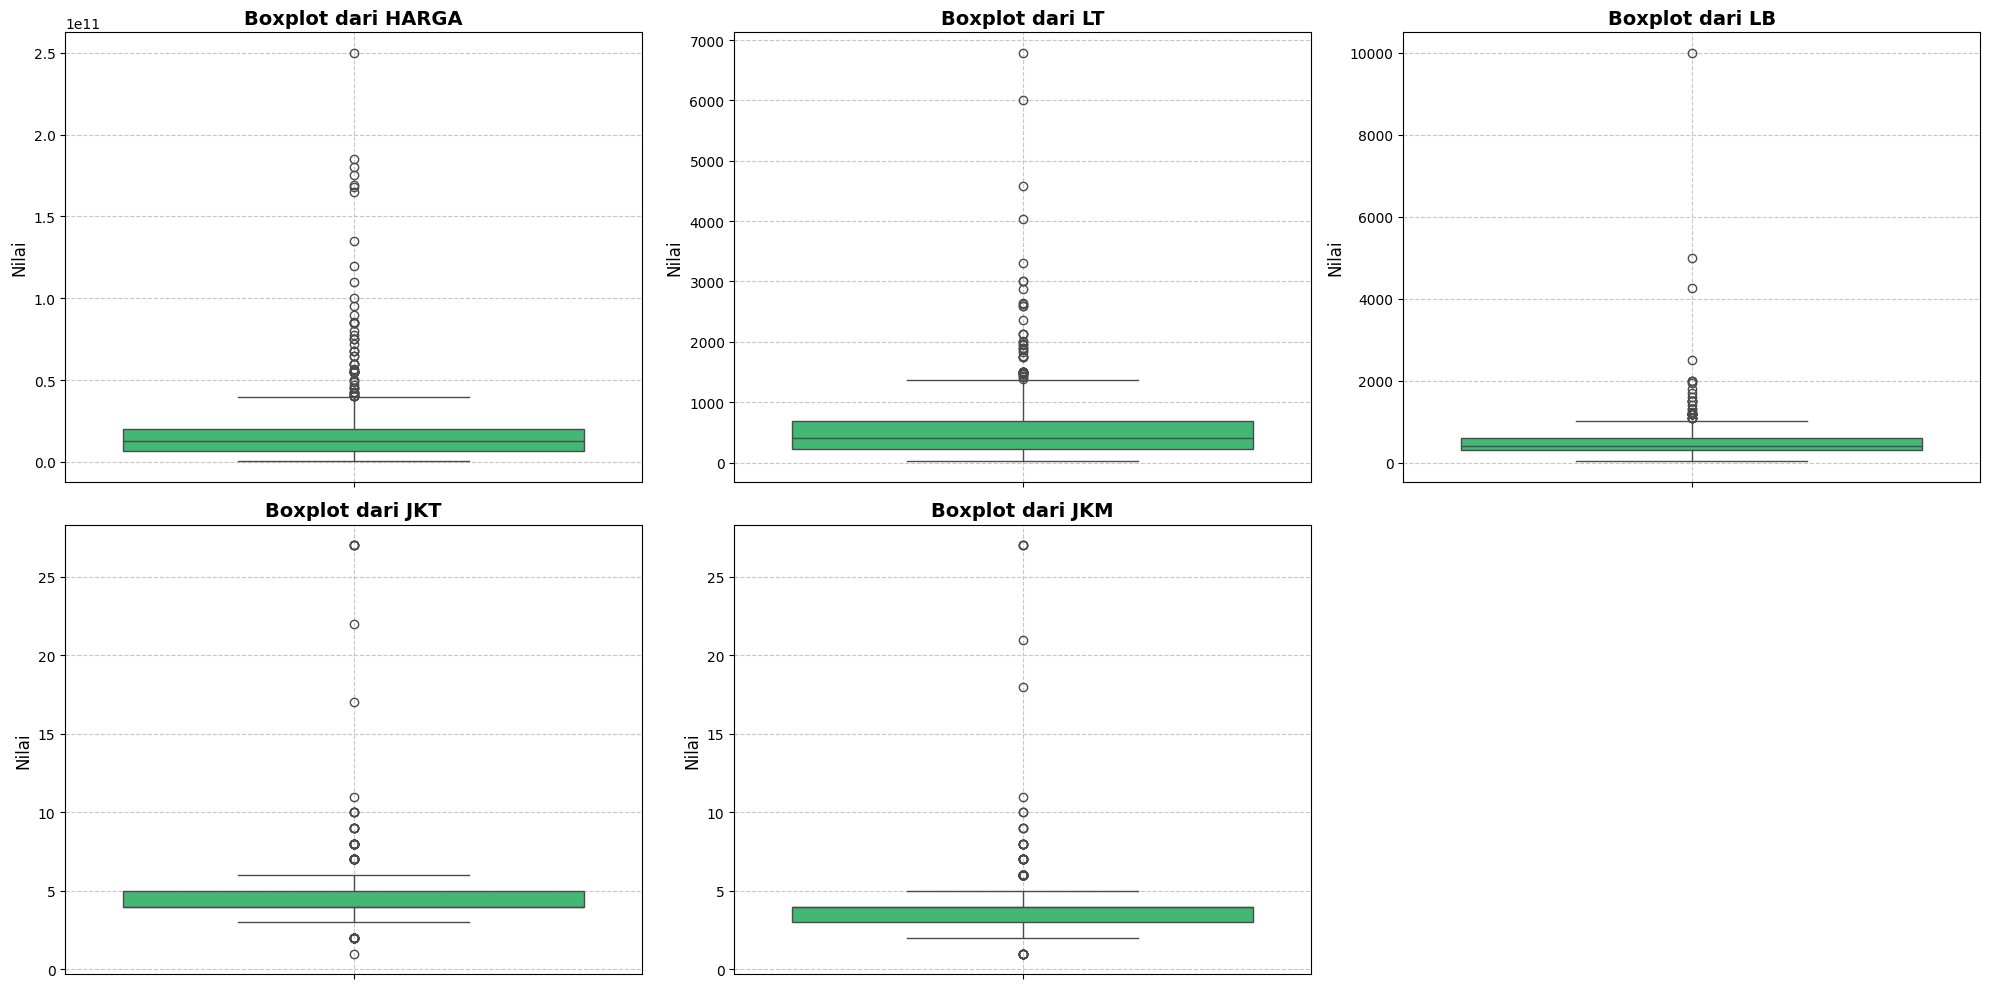

In [1335]:
# Mendapatkan col num
col_num = df.select_dtypes(include='number').columns

# Visualisasi boxplot
print("\nBoxplot untuk setiap fitur:")
# Mendapatkan kolom dan row untuk subplot
num_columns = len(col_num)
num_rows = (num_columns + 2) // 3  # Atur 3 kolom per baris

# Kode visualisasi
plt.figure(figsize=(20, 5 * num_rows))
for i, column in enumerate(col_num):
    plt.subplot(num_rows, 3, i + 1)
    sns.boxplot(y=df[column], color='#2ecc71')
    plt.title(f'Boxplot dari {column}', fontsize=14, fontweight='bold')
    plt.ylabel('Nilai', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

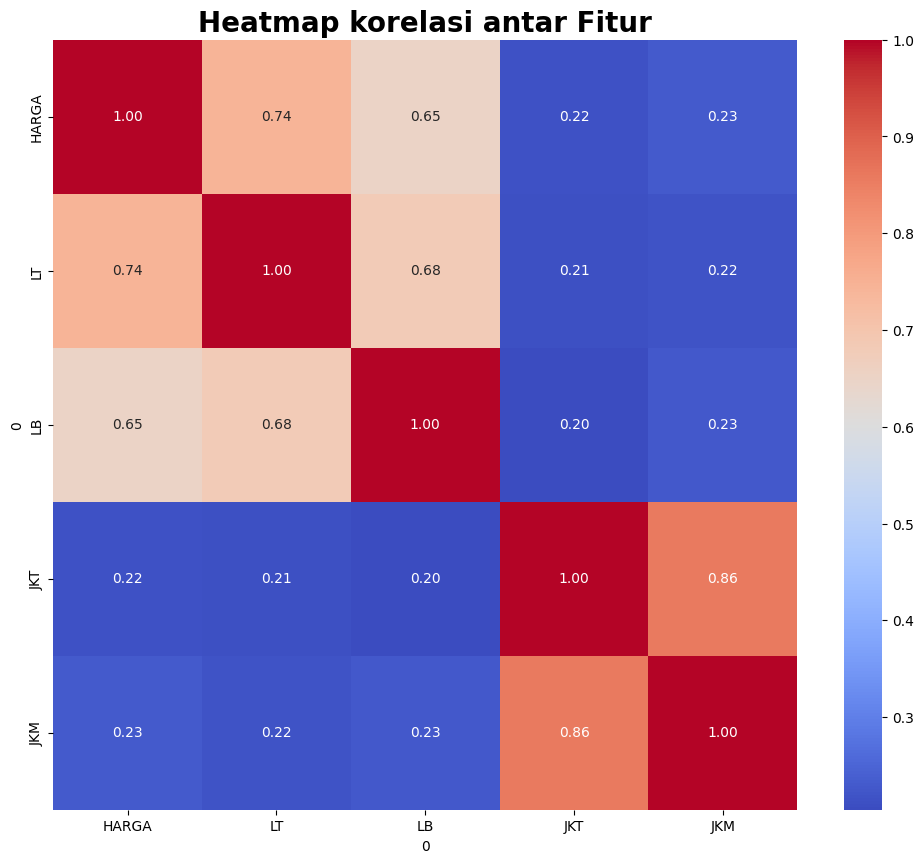

In [1336]:
# Korelasi menggunakan heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap korelasi antar Fitur', fontsize=20, fontweight='bold')
plt.show()

## **Data Preprocessing**

In [1337]:
# Menambah kolom baru karena lb dan lt jika dikalikan terlihat seperti akan memberikan kolom yang bermakna
df["Luas"] = df['LB'] * df['LT']

Kolom Numerik Berupa :  Index(['Luas', 'HARGA'], dtype='object', name=0)

Visualisasi Distribusi Setiap Fitur:
Kolom Numerik Berupa :  Index(['Luas', 'HARGA'], dtype='object', name=0)

Visualisasi Scatterplot Setiap Fitur:


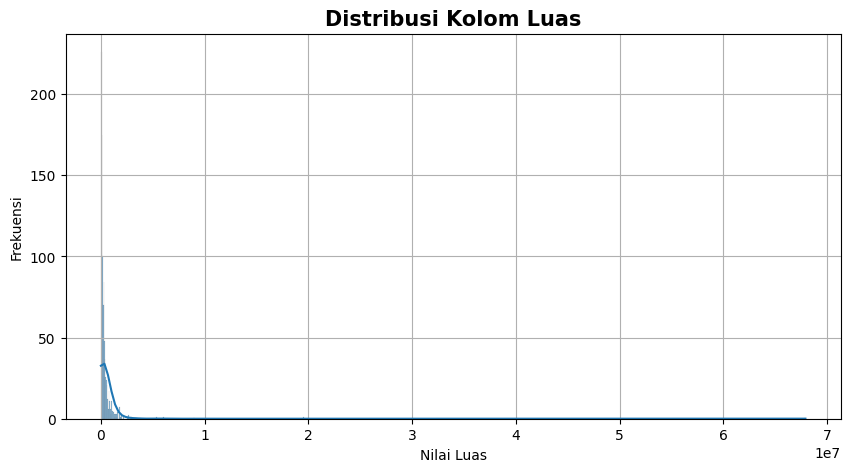

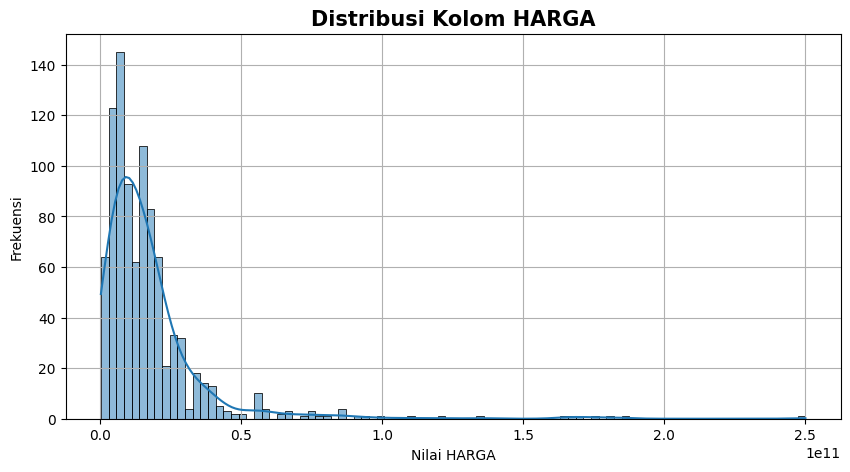

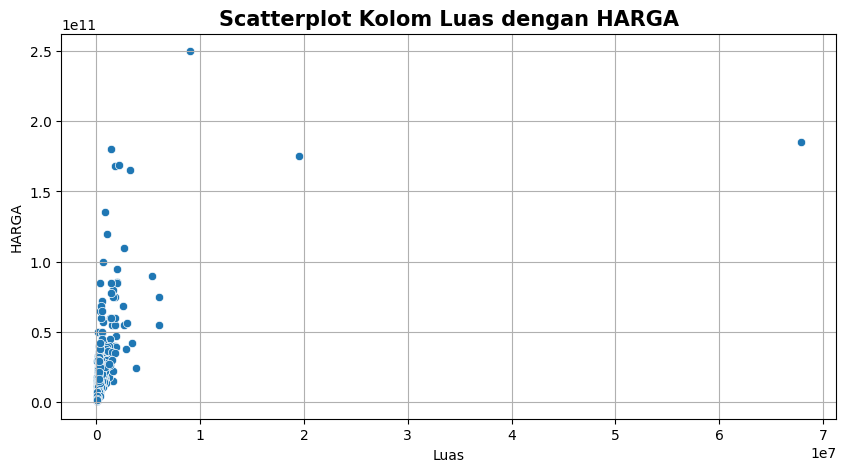

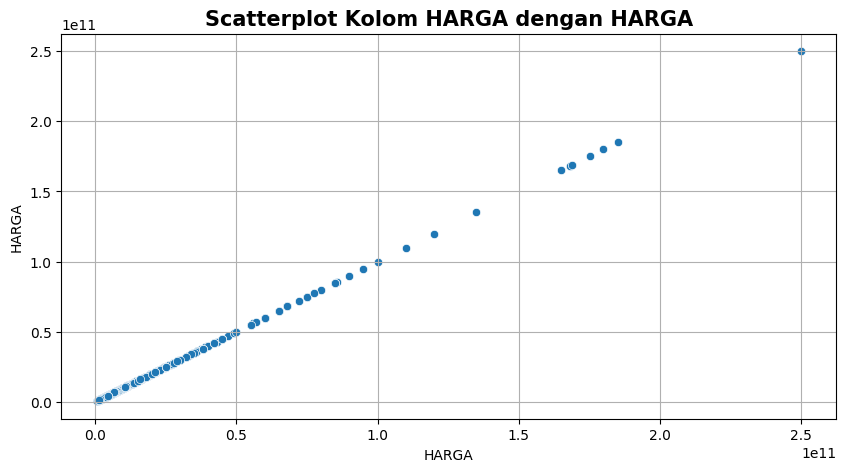

In [1338]:
visualisasi_histogram(df[['Luas', 'HARGA']])
visualisasi_scatter(df[['Luas', 'HARGA']])

In [1339]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(df[categorical_columns])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

df = pd.concat([df, one_hot_df], axis=1)

df = df.drop(categorical_columns, axis=1)
print(f"Data yang sudah di encoded : \n{df}")

Data yang sudah di encoded : 
            HARGA      LT     LB  JKT  JKM      Luas  GRS_ADA  GRS_TIDAK ADA  \
0    2.800000e+10  1100.0  700.0  5.0  6.0  770000.0      1.0            0.0   
1    1.900000e+10   824.0  800.0  4.0  4.0  659200.0      1.0            0.0   
2    4.700000e+09   500.0  400.0  4.0  3.0  200000.0      1.0            0.0   
3    4.900000e+09   251.0  300.0  5.0  4.0   75300.0      1.0            0.0   
4    2.800000e+10  1340.0  575.0  4.0  5.0  770500.0      1.0            0.0   
..            ...     ...    ...  ...  ...       ...      ...            ...   
926  1.600000e+10   488.0  550.0  6.0  5.0  268400.0      1.0            0.0   
927  4.500000e+09   209.0  270.0  4.0  4.0   56430.0      1.0            0.0   
928  2.900000e+10   692.0  400.0  4.0  3.0  276800.0      0.0            1.0   
929  1.700000e+09   102.0  140.0  4.0  3.0   14280.0      0.0            1.0   
930  1.250000e+09    63.0  110.0  3.0  3.0    6930.0      0.0            1.0   

     KOTA

In [1340]:
# Melakukan log transformasi ke kolom yang masih distribusinya skewed
df[["HARGA", "LT", "LB", "Luas", "JKM", "JKT"]] = np.log(df[["HARGA", "LT", "LB", "Luas", "JKM", "JKT"]])

Kolom Numerik Berupa :  Index(['HARGA', 'LT', 'LB', 'JKT', 'JKM', 'Luas', 'GRS_ADA', 'GRS_TIDAK ADA',
       'KOTA_JAKSEL'],
      dtype='object')

Visualisasi Distribusi Setiap Fitur:


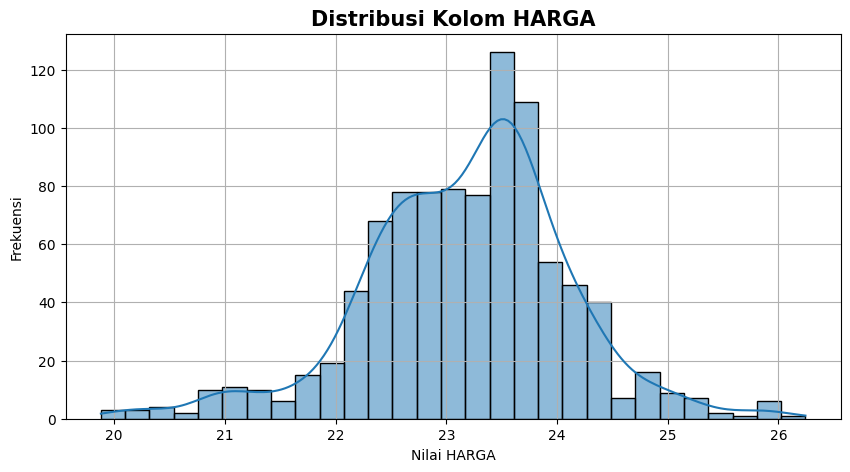

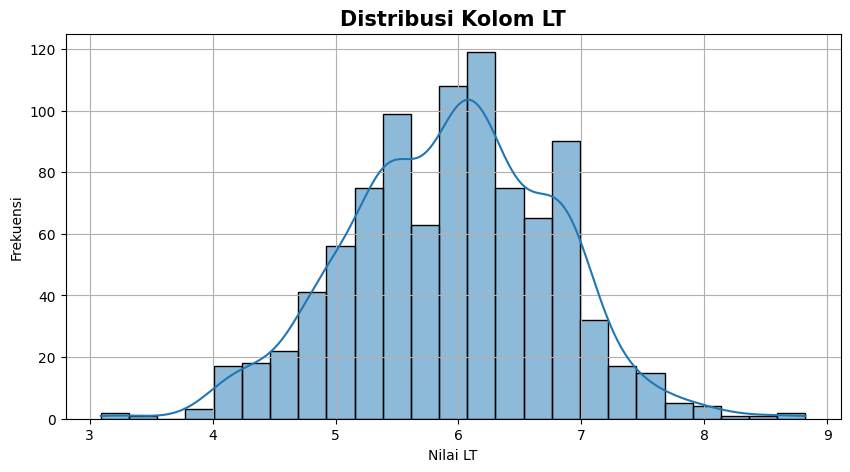

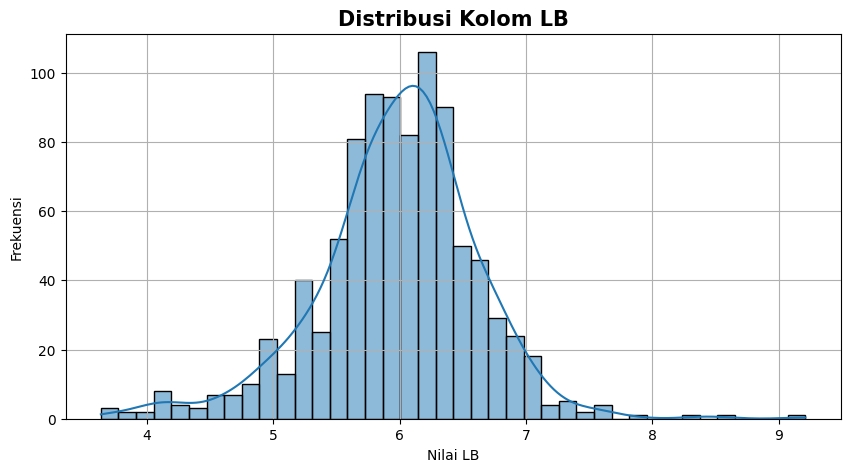

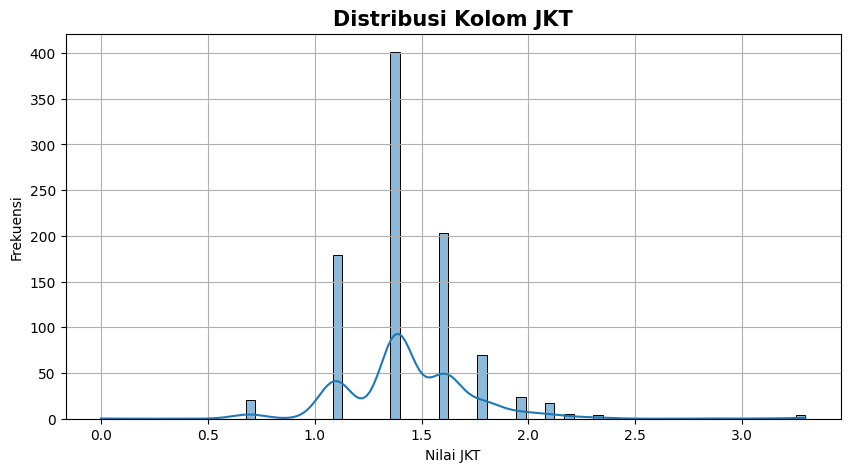

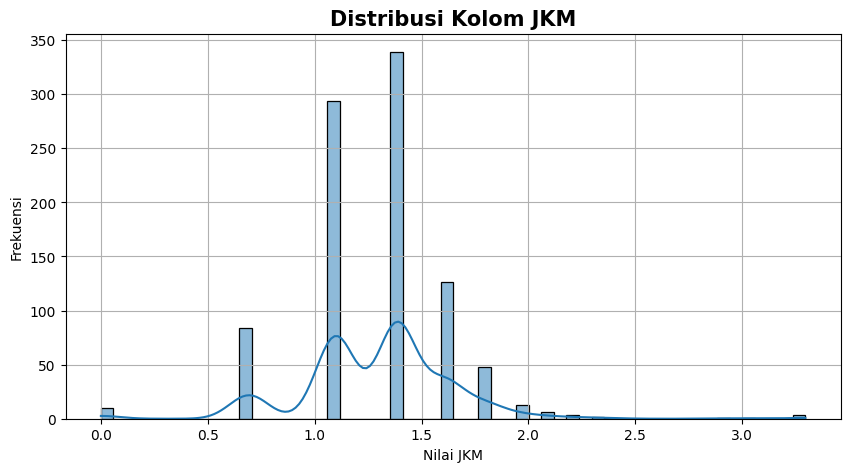

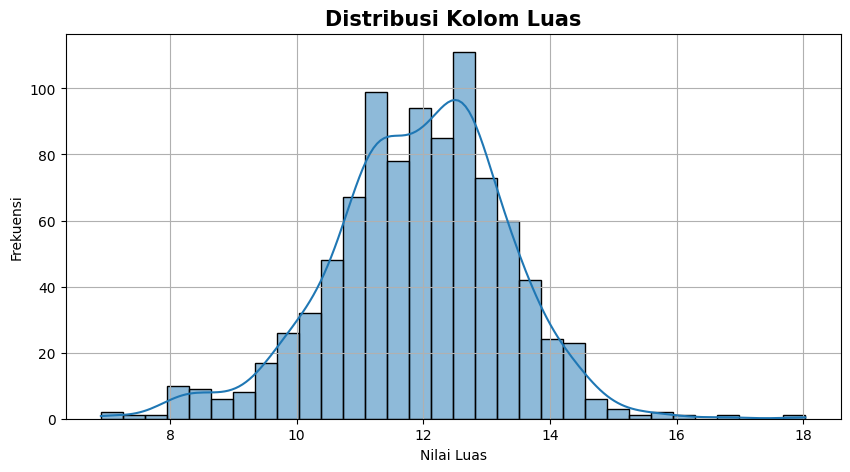

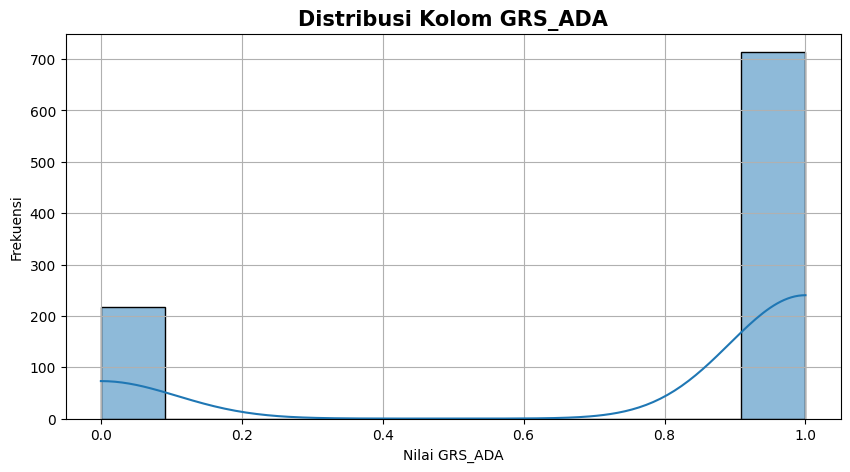

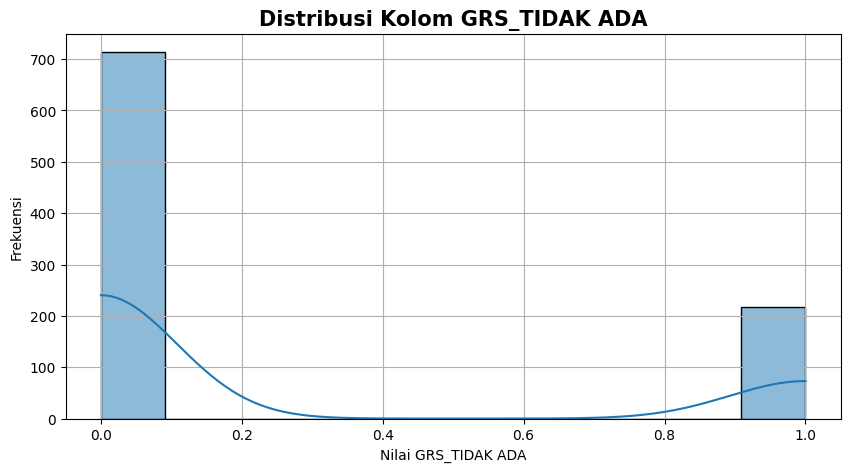

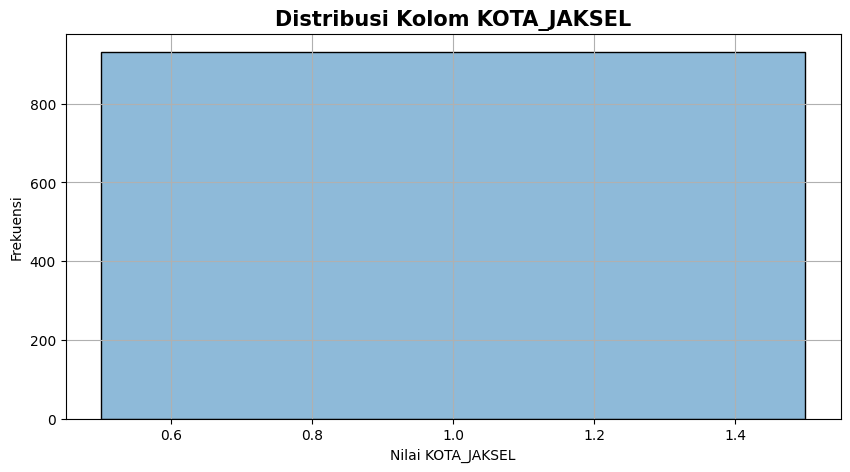

In [1341]:
# Liat visualisasi histogram setelah transformasi fitur
visualisasi_histogram(df)

Kolom Numerik Berupa :  Index(['HARGA', 'LT', 'LB', 'JKT', 'JKM', 'Luas', 'GRS_ADA', 'GRS_TIDAK ADA',
       'KOTA_JAKSEL'],
      dtype='object')

Visualisasi Scatterplot Setiap Fitur:


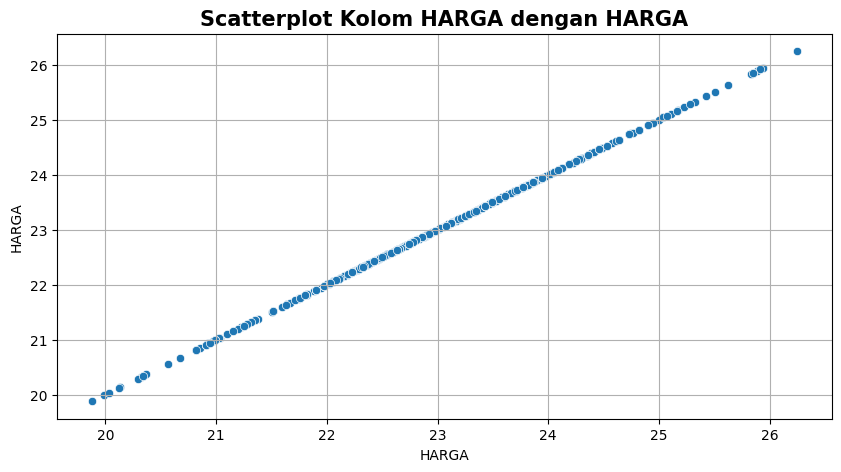

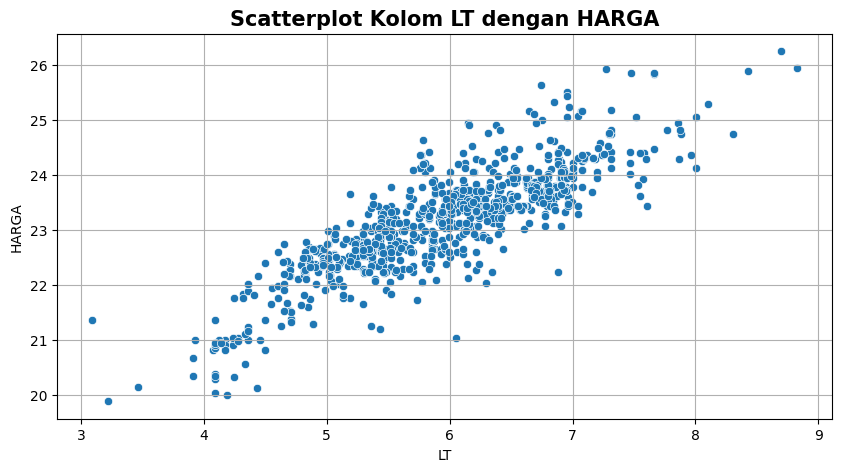

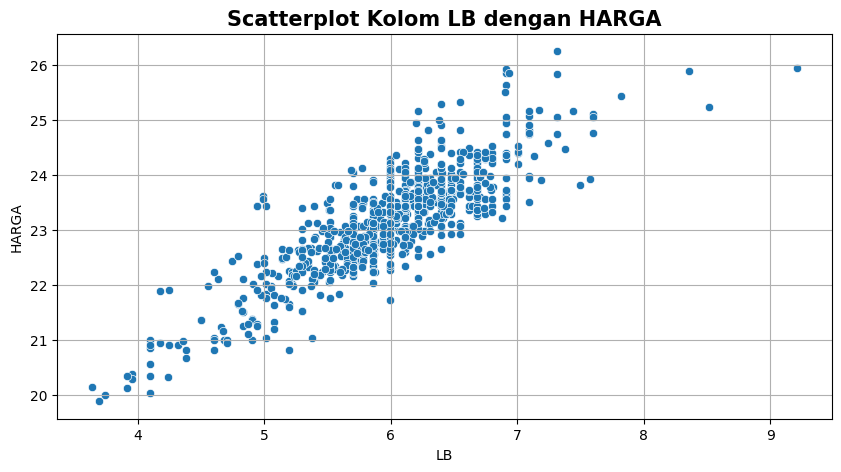

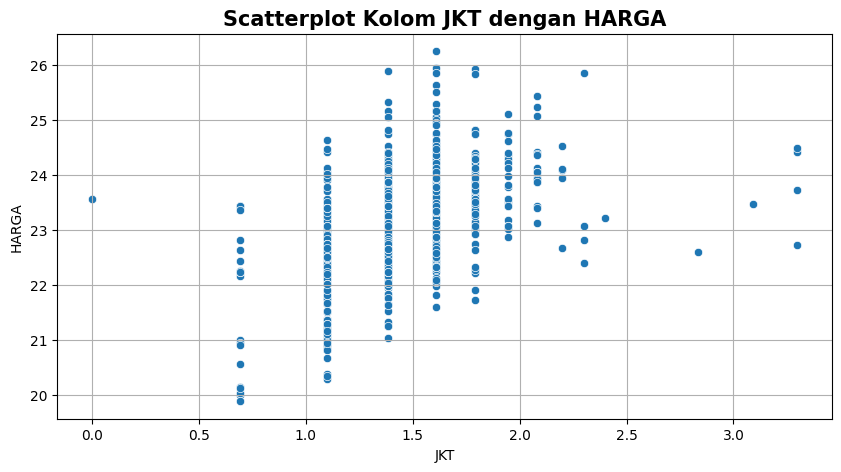

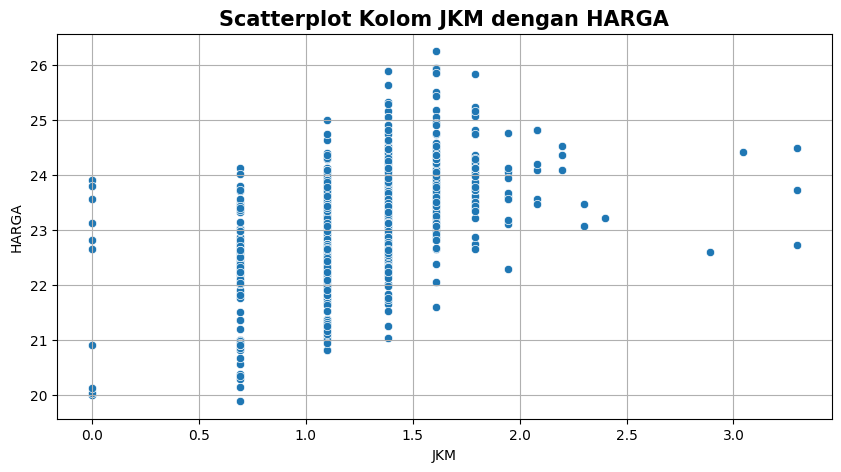

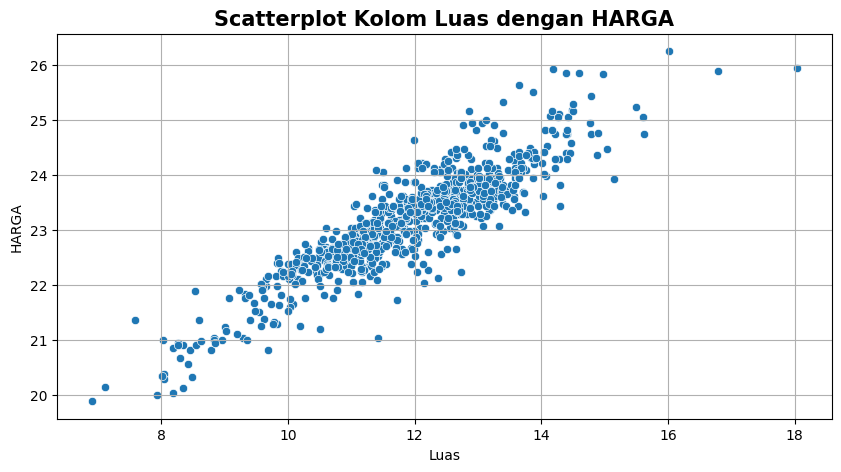

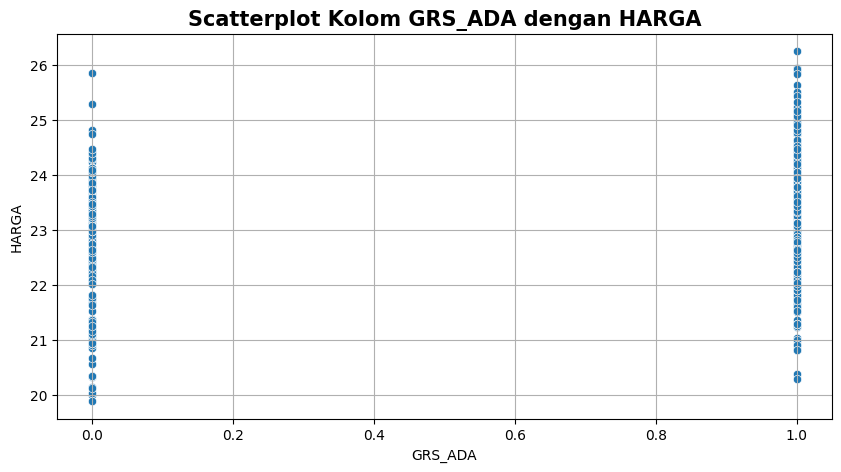

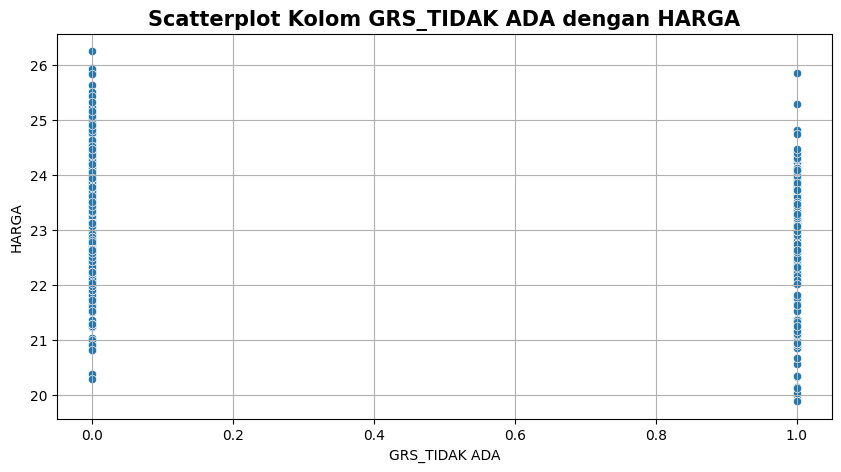

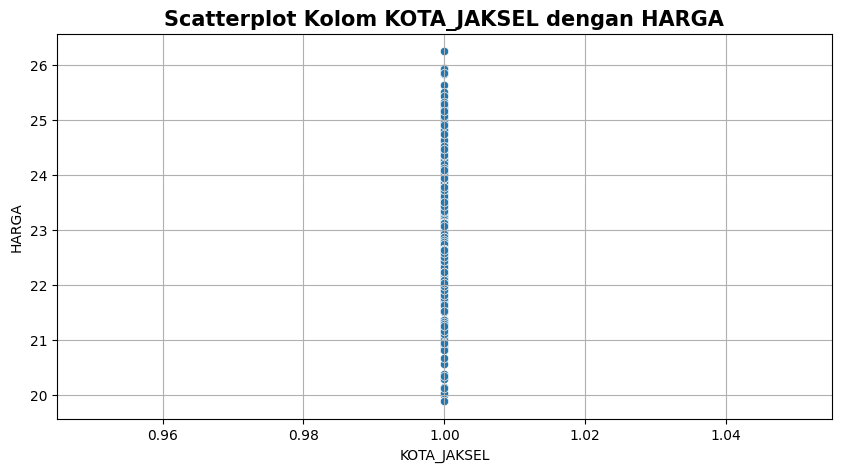

In [1342]:
# Liat visualisasi scatterplot setelah transformasi
visualisasi_scatter(df)

In [1343]:
# # JKM dan JKT tidak terlihat linear jadi kita transformasi
# df['JKM'] = np.log((df['JKM'])**5)
# df['JKT'] = np.log((df['JKT'])**5)

# # Liat hasil plot setelah transformasi
# visualisasi_scatter(df[["JKT", "JKM","HARGA"]])

In [1344]:
# # JKM dan JKT tidak terlihat linear jadi kita transformasi
# df['JKM'] = np.log(df['JKM'])
# df['JKT'] = np.log(df['JKT'])

# # Liat hasil plot setelah transformasi
# visualisasi_scatter(df[["JKT", "JKM", "HARGA"]])

In [1345]:
# # Drop kolom NO karena tidak berguna
# df = df.drop('NO', axis=1)

In [1346]:
# Split the data into features (X) and target (y)
X = df.drop('HARGA', axis=1)
y = df['HARGA']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Untuk validatin sets
# X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [1347]:
# Melihat yang semua kolom outlier
filt = ((X_train[["LT", "LB", "JKT","JKM"]] <= 3) & (X_train[["LT", "LB", "JKT","JKM"]] >= -3)).all(axis=1).value_counts()
filt

,count
False,558


In [1348]:
# Normalisasi
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

## **Modeling**

In [1349]:
# Ngebuat parameter distribusi
param_dist = {'n_neighbors': list(range(1,10)),}

# Buat model
knn = KNeighborsRegressor()

# Gabungkan data train dan test
X_combined = np.concatenate((X_train, X_val))
y_combined = np.concatenate((y_train, y_val))

# Buat test_fold: -1 untuk train, 0 untuk test
your_test_fold = [-1] * len(X_train) + [0] * len(X_val)

# Buat predefined split
ps = PredefinedSplit(test_fold=your_test_fold)

# Menggunakan gridsearch untuk mencari param terbaik
grid_sc = GridSearchCV(knn,
                       param_grid = param_dist,
                       n_jobs=-1,
                       verbose=3,
                       cv=ps)

# Fit gridsearch ke data
grid_sc.fit(X_combined, y_combined)

# Get the best parameters and score
print("Parameters Terbaik: ", grid_sc.best_params_)
print("Grid Search score terbaik: ", grid_sc.best_score_)

# Model paling baik
knn = grid_sc.best_estimator_

Fitting 1 folds for each of 9 candidates, totalling 9 fits
Parameters Terbaik:  {'n_neighbors': 7}
Grid Search score terbaik:  0.7989073565165727


## **NO 2**

In [1350]:
# Prediksi Validation sets
y_pred = knn.predict(X_val)

# Menghitung Performa
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
rmse = np.sqrt(np.mean(np.square((y_pred - y_val))))
print("Evaluasi Model KNN pada Validation Set")
print("-" * 40)
print(f"MAE dari model KNN adalah : {mae}")
print(f"RMSE dari model KNN adalah : {rmse}")
print(f"R^2 dari model KNN adalah : {r2}")

Evaluasi Model KNN pada Validation Set
----------------------------------------
MAE dari model KNN adalah : 0.2719702888259046
RMSE dari model KNN adalah : 0.37855114264584183
R^2 dari model KNN adalah : 0.8432405590581592


In [1351]:
# Prediksi
y_pred = knn.predict(X_test)

# Menghitung Performa
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(np.mean(np.square((y_pred - y_test))))
print("Evaluasi Model KNN pada Testing Set")
print("-" * 40)
print(f"MAE dari model KNN adalah : {mae}")
print(f"RMSE dari model KNN adalah : {rmse}")
print(f"R^2 dari model KNN adalah : {r2}")

Evaluasi Model KNN pada Testing Set
----------------------------------------
MAE dari model KNN adalah : 0.3207240101787058
RMSE dari model KNN adalah : 0.41259779021094617
R^2 dari model KNN adalah : 0.7755798287543246


## **NO 3**

## **LINEAR REGRESI**

**SEDERHANA**

In [1352]:
# Sederhana fitur x nya hanya 1 kolom
# Split the data ke fitur (X) dan target (y)
X = df[['LT']]
y = df['HARGA']

# Split data ke training set dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Untuk validatin sets
# X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

# Normalisasi
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [1353]:
# Membuat parameter distribusi
param_dist = {'fit_intercept': [True, False]}

# Buat model Linear Regression
lin_reg = LinearRegression()

# Gabungkan data train dan test
X_combined = np.concatenate((X_train, X_val))
y_combined = np.concatenate((y_train, y_val))

# Buat test_fold: -1 untuk train, 0 untuk test
your_test_fold = [-1] * len(X_train) + [0] * len(X_val)

# Buat predefined split
ps = PredefinedSplit(test_fold=your_test_fold)


# GridSearch untuk mencari parameter terbaik
grid_sc = GridSearchCV(lin_reg,
                       param_grid=param_dist,
                       n_jobs=-1,
                       verbose=3,
                       cv=ps)

# Fit ke data
grid_sc.fit(X_combined, y_combined)

# Tampilkan hasil
print("Parameters Terbaik: ", grid_sc.best_params_)
print("Grid Search score terbaik: ", grid_sc.best_score_)

# Model terbaik
lin_reg = grid_sc.best_estimator_

Fitting 1 folds for each of 2 candidates, totalling 2 fits
Parameters Terbaik:  {'fit_intercept': True}
Grid Search score terbaik:  0.7142558701501815


In [1354]:
# Prediksi Validation sets
y_pred = lin_reg.predict(X_val)

# Menghitung Performa
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
rmse = np.sqrt(np.mean(np.square((y_pred - y_val))))
print("Evaluasi Model Linear Regression (Sederhana) pada Validation Set")
print("-" * 80)
print(f"MAE dari model Linear Regression (Sederhana) adalah : {mae}")
print(f"RMSE dari model Linear Regression (Sederhana) adalah : {rmse}")
print(f"R^2 dari model Linear Regression (Sederhana) adalah : {r2}")

Evaluasi Model Linear Regression (Sederhana) pada Validation Set
--------------------------------------------------------------------------------
MAE dari model Linear Regression (Sederhana) adalah : 0.3670319297301506
RMSE dari model Linear Regression (Sederhana) adalah : 0.4832269671817125
R^2 dari model Linear Regression (Sederhana) adalah : 0.715803646559714


In [1355]:
# Prediksi Testing set
y_pred = lin_reg.predict(X_test)

# Menghitung Performa
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(np.mean(np.square((y_pred - y_test))))
print("Evaluasi Model Linear Regression (Sederhana) pada Testing Set")
print("-" * 80)
print(f"MAE dari model Linear Regression (Sederhana) adalah : {mae}")
print(f"RMSE dari model Linear Regression (Sederhana) adalah : {rmse}")
print(f"R^2 dari model Linear Regression (Sederhana) adalah : {r2}")

Evaluasi Model Linear Regression (Sederhana) pada Testing Set
--------------------------------------------------------------------------------
MAE dari model Linear Regression (Sederhana) adalah : 0.3721906002869247
RMSE dari model Linear Regression (Sederhana) adalah : 0.5013751338375896
R^2 dari model Linear Regression (Sederhana) adalah : 0.7206270495538816


**BERGANDA**

In [1356]:
# Split the data ke fitur (X) dan target (y)
X = df.drop('HARGA', axis=1)
y = df['HARGA']

# Split data ke training set dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

# Normalisasi
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [1357]:
# Membuat parameter distribusi
param_dist = {'fit_intercept': [True, False]}

# Buat model Linear Regression
lin_reg = LinearRegression()

# Gabungkan data train dan test
X_combined = np.concatenate((X_train, X_val))
y_combined = np.concatenate((y_train, y_val))

# Buat test_fold: -1 untuk train, 0 untuk test
your_test_fold = [-1] * len(X_train) + [0] * len(X_val)

# Buat predefined split
ps = PredefinedSplit(test_fold=your_test_fold)

# GridSearch untuk mencari parameter terbaik
grid_sc = GridSearchCV(lin_reg,
                       param_grid=param_dist,
                       n_jobs=-1,
                       verbose=3,
                       cv=ps)

# Fit ke data
grid_sc.fit(X_combined, y_combined)

# Tampilkan hasil
print("Parameters Terbaik: ", grid_sc.best_params_)
print("Grid Search score terbaik: ", grid_sc.best_score_)

# Model terbaik
lin_reg = grid_sc.best_estimator_

Fitting 1 folds for each of 2 candidates, totalling 2 fits
Parameters Terbaik:  {'fit_intercept': True}
Grid Search score terbaik:  0.7917359815698813


In [1358]:
# Prediksi Validation set
y_pred = lin_reg.predict(X_val)

# Menghitung Performa
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
rmse = np.sqrt(np.mean(np.square((y_pred - y_val))))
print("Evaluasi Model Linear Regression (Berganda) pada Validation Set")
print("-" * 80)
print(f"MAE dari model Linear Regression (Berganda) adalah : {mae}")
print(f"RMSE dari model Linear Regression (Berganda) adalah : {rmse}")
print(f"R^2 dari model Linear Regression (Berganda) adalah : {r2}")

Evaluasi Model Linear Regression (Berganda) pada Validation Set
--------------------------------------------------------------------------------
MAE dari model Linear Regression (Berganda) adalah : 0.3200647506199056
RMSE dari model Linear Regression (Berganda) adalah : 0.4327275812968597
R^2 dari model Linear Regression (Berganda) adalah : 0.7945486143469594


In [1366]:
# Prediksi Testing set
y_pred = lin_reg.predict(X_test)

# Menghitung Performa
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(np.mean(np.square((y_pred - y_test))))
print("Evaluasi Model Linear Regression (Berganda) pada Testing Set")
print("-" * 80)
print(f"MAE dari model Linear Regression (Berganda) adalah : {mae}")
print(f"RMSE dari model Linear Regression (Berganda) adalah : {rmse}")
print(f"R^2 dari model Linear Regression (Berganda) adalah : {r2}")

Evaluasi Model Linear Regression (Berganda) pada Testing Set
--------------------------------------------------------------------------------
MAE dari model Linear Regression (Berganda) adalah : 0.25615891797662976
RMSE dari model Linear Regression (Berganda) adalah : 0.33402179590430625
R^2 dari model Linear Regression (Berganda) adalah : 0.8146977027079988


## **Decision Tree**

In [1360]:
# Membuat distribusi parameter yang ingin diuji
param_dist = {
    'max_depth': [None, 3, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisiasi model Decision Tree
dec_tree = DecisionTreeRegressor(random_state=42)

# GridSearchCV untuk mencari parameter terbaik
grid_sc = GridSearchCV(dec_tree,
                       param_grid=param_dist,
                       n_jobs=-1,
                       verbose=3,
                       cv=ps)

# Fit ke data training
grid_sc.fit(X_combined, y_combined)

# Tampilkan parameter terbaik dan skor validasi silang terbaik
print("Parameters Terbaik: ", grid_sc.best_params_)
print("Grid Search score terbaik: ", grid_sc.best_score_)

# Simpan model terbaik
dec_tree = grid_sc.best_estimator_

Fitting 1 folds for each of 45 candidates, totalling 45 fits
Parameters Terbaik:  {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Grid Search score terbaik:  0.7744839623520092


In [1361]:
# Prediksi Validation set
y_pred = dec_tree.predict(X_val)

# Menghitung Performa
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
rmse = np.sqrt(np.mean(np.square((y_pred - y_val))))
print("Evaluasi Model Decision Tree pada Validation Set")
print("-" * 80)
print(f"MAE dari model Decision Tree adalah : {mae}")
print(f"RMSE dari model Decision Tree adalah : {rmse}")
print(f"R^2 dari model Decision Tree adalah : {r2}")

Evaluasi Model Decision Tree pada Validation Set
--------------------------------------------------------------------------------
MAE dari model Decision Tree adalah : 0.2823208218825229
RMSE dari model Decision Tree adalah : 0.3901122016461257
R^2 dari model Decision Tree adalah : 0.833022102506354


In [1362]:
# Prediksi Testing
y_pred = dec_tree.predict(X_test)

# Menghitung Performa
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(np.mean(np.square((y_pred - y_test))))
print("Evaluasi Model Decision Tree pada Testing Set")
print("-" * 70)
print(f"MAE dari model Decision Tree adalah : {mae}")
print(f"RMSE dari model Decision Tree adalah : {rmse}")
print(f"R^2 dari model Decision Tree adalah : {r2}")

Evaluasi Model Decision Tree pada Testing Set
----------------------------------------------------------------------
MAE dari model Decision Tree adalah : 0.2530196220867185
RMSE dari model Decision Tree adalah : 0.34498846838187874
R^2 dari model Decision Tree adalah : 0.8023301889320895


## **Random Forest**

In [1363]:
# Buat parameter distribusi untuk dicoba
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Inisiasi model Random Forest
rf = RandomForestRegressor(random_state=42)

# GridSearch untuk mencari parameter terbaik
grid_sc = GridSearchCV(rf,
                       param_grid=param_dist,
                       n_jobs=-1,
                       verbose=3,
                       cv=ps)

# Fit ke data training
grid_sc.fit(X_combined, y_combined)

# Tampilkan parameter terbaik dan skor validasi silang terbaik
print("Parameters Terbaik: ", grid_sc.best_params_)
print("Grid Search score terbaik: ", grid_sc.best_score_)

# Simpan model terbaik
rf = grid_sc.best_estimator_

Fitting 1 folds for each of 36 candidates, totalling 36 fits
Parameters Terbaik:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Grid Search score terbaik:  0.7623711745447184


In [1364]:
# Prediksi Validation set
y_pred = rf.predict(X_val)

# Menghitung Performa
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
rmse = np.sqrt(np.mean(np.square((y_pred - y_val))))
print("Evaluasi Random Forest pada Validation Set")
print("-" * 80)
print(f"MAE dari Random Forest adalah : {mae}")
print(f"RMSE dari Random Forest adalah : {rmse}")
print(f"R^2 dari Random Forest adalah : {r2}")

Evaluasi Random Forest pada Validation Set
--------------------------------------------------------------------------------
MAE dari Random Forest adalah : 0.1976038846105107
RMSE dari Random Forest adalah : 0.2839932693545634
R^2 dari Random Forest adalah : 0.9115096291961104


In [1365]:
# Prediksi
y_pred = rf.predict(X_test)

# Menghitung Performa
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(np.mean(np.square((y_pred - y_test))))
print(f"MAE dari model Random Forest adalah : {mae}")
print(f"RMSE dari model Random Forest adalah : {rmse}")
print(f"R^2 dari model Random Forest adalah : {r2}")

MAE dari model Random Forest adalah : 0.23971815510218852
RMSE dari model Random Forest adalah : 0.31674257288088337
R^2 dari model Random Forest adalah : 0.8333735006370795
